In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


'canny' :

*   Takes an image as input and converts it to grayscale because it has only one chanel and each pixel has only one intensity value so processing the image becomes easier.
*   Performs Gaussian Blur to reduce noise: It performs convolution of a kernel of gaussian values with the given image and returns a new image.
*   Calls the 'Canny' method from openCV that detects edges by finding the derivative of a fucntion of pixel intensities therefore calculating the gradient (change in intensity) with respect to adjacent pixels.



    










In [ ]:
def canny(image):
  gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)#converts image from one RGB to GRAYSCALE
  blur=cv2.GaussianBlur(gray,(5,5),0)#reduces noise in the image
  canny=cv2.Canny(blur,50,150)#Compute derivative in all directions to find gradient
  return canny

region_of_interest:

*   Returns a masked image which only has the lanes we are concerned with.
*   uses bitwise and between the image returned by canny(with edges defined) and mask consisting of out region of interest.




In [ ]:
def region_of_interest(image):
  height=image.shape[0]
  polygons=np.array([[(200,height),(1100,height),(550,250)]])
  mask=np.zeros_like(image)
  cv2.fillPoly(mask,polygons,255)
  masked_image=cv2.bitwise_and(image,mask)
  return masked_image

display_lines:



*   takes an image and a set of lines as input, then draws the detected lines onto a blank image and returns it, utilizing a predefined color and thickness for the lines.




In [ ]:
def display_lines(image,lines):
  line_image=np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2=line.reshape(4)
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
  return line_image

make_coordinates:
*   computes the starting and ending coordinates of average line using mean of slope and intercept parameters, then returns them in an array format.




In [ ]:
def make_coordinates(image,line_parameters):
    slope,intercept=line_parameters
    y1=image.shape[0]
    y2=int(y1*(3/5))
    x1=int((y1-intercept)/slope)
    x2=int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])


average_slope_intercept:
*   iterates through detected lines, categorizing them into left or right lanes based on slope. then computes the average slope and intercept for each lane group, generates start and end lane coordinates for both lanes using make_coordinates and returns them.



In [ ]:
def average_slope_intercept(image,lines):
  left_fit=[]
  right_fit=[]
  for line in lines:

    x1,y1,x2,y2=line.reshape(4)
    parameters=np.polyfit((x1,x2),(y1,y2),1)

    slope=parameters[0]
    intercept=parameters[1]

    if slope<0:
      left_fit.append((slope,intercept))
    else:
      right_fit.append((slope,intercept))
  left_fit_average=np.average(left_fit,axis=0)
  right_fit_average=np.average(right_fit,axis=0)
  left_line=make_coordinates(image,left_fit_average)
  right_line=make_coordinates(image,right_fit_average)
  return np.array([left_line,right_line])

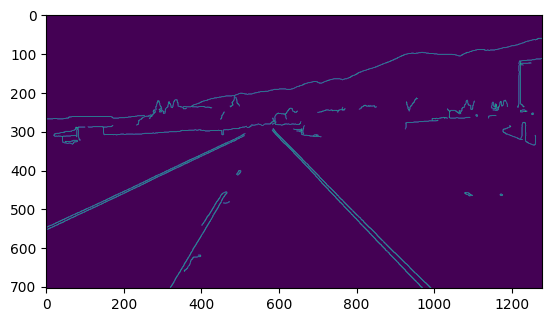

In [ ]:
image=cv2.imread("test_image.jpg")#returns numpy array with relative intensity of each pixel in image
lane_image=np.copy(image)
canny_image=canny(lane_image)
plt.imshow(canny_image)
plt.show()

Get only the region of interest:

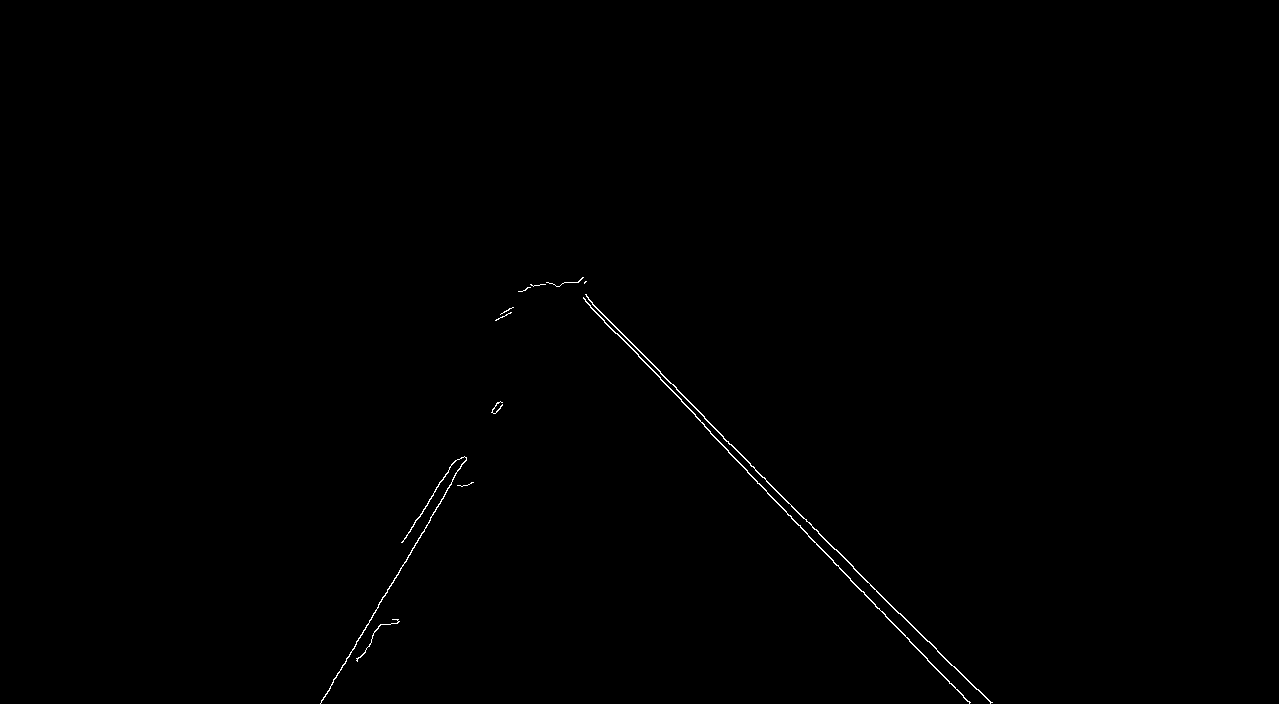

In [ ]:
cropped_image=region_of_interest(canny_image)
cv2_imshow(cropped_image)

Applying Hough Line Transform:
*   Used to detect straight lines
*   A more efficient implementation of the Hough Line Transform is Probabilistic Hough Line Transform.It gives as output the extremes of the detected lines(x1,y1,x2,y2)



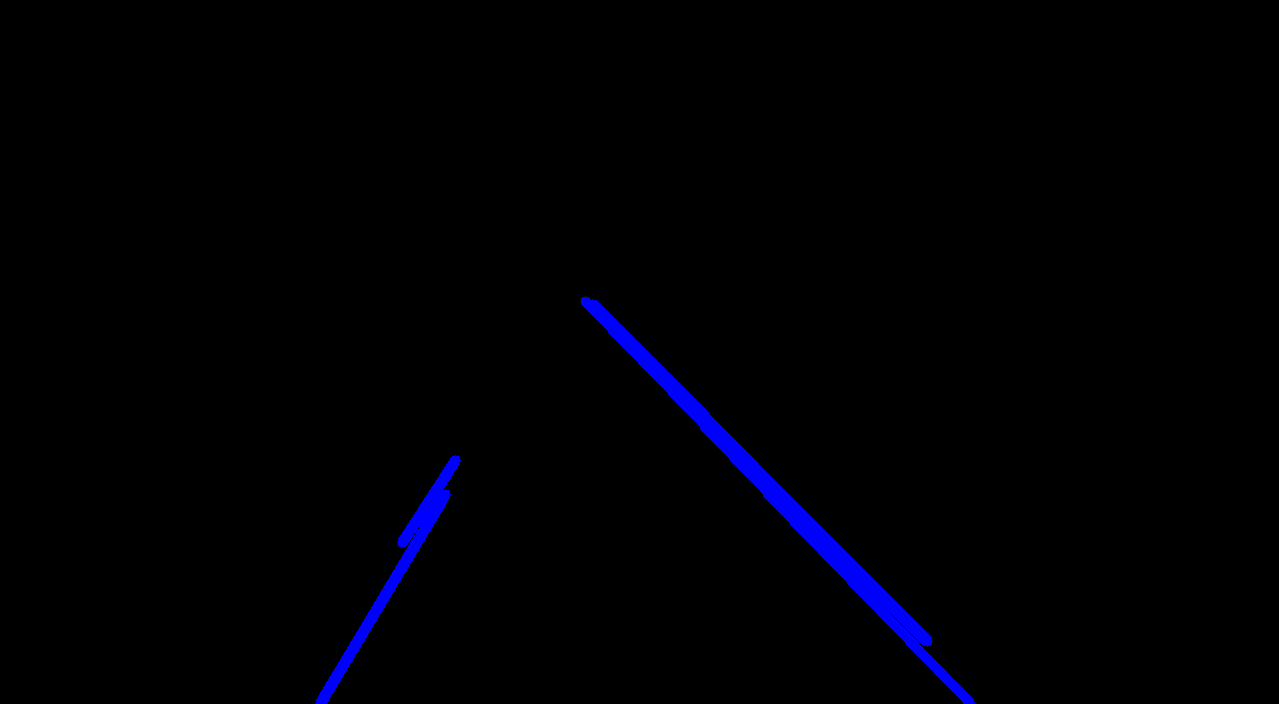

In [ ]:
lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
line_image=display_lines(lane_image,lines)
cv2_imshow(line_image)

Blend both images:

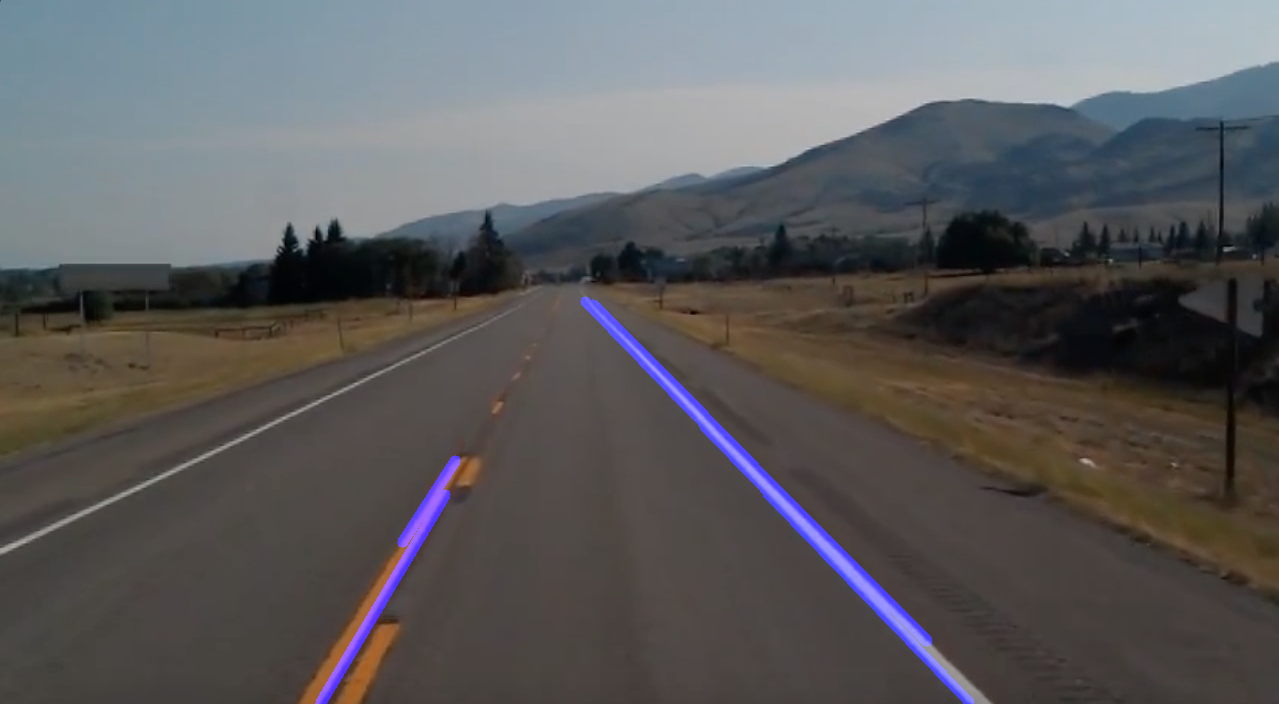

In [ ]:
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
cv2_imshow(combo_image)

#Optimization:

*   we take the average value of the different lines obtained to have a more optimized output




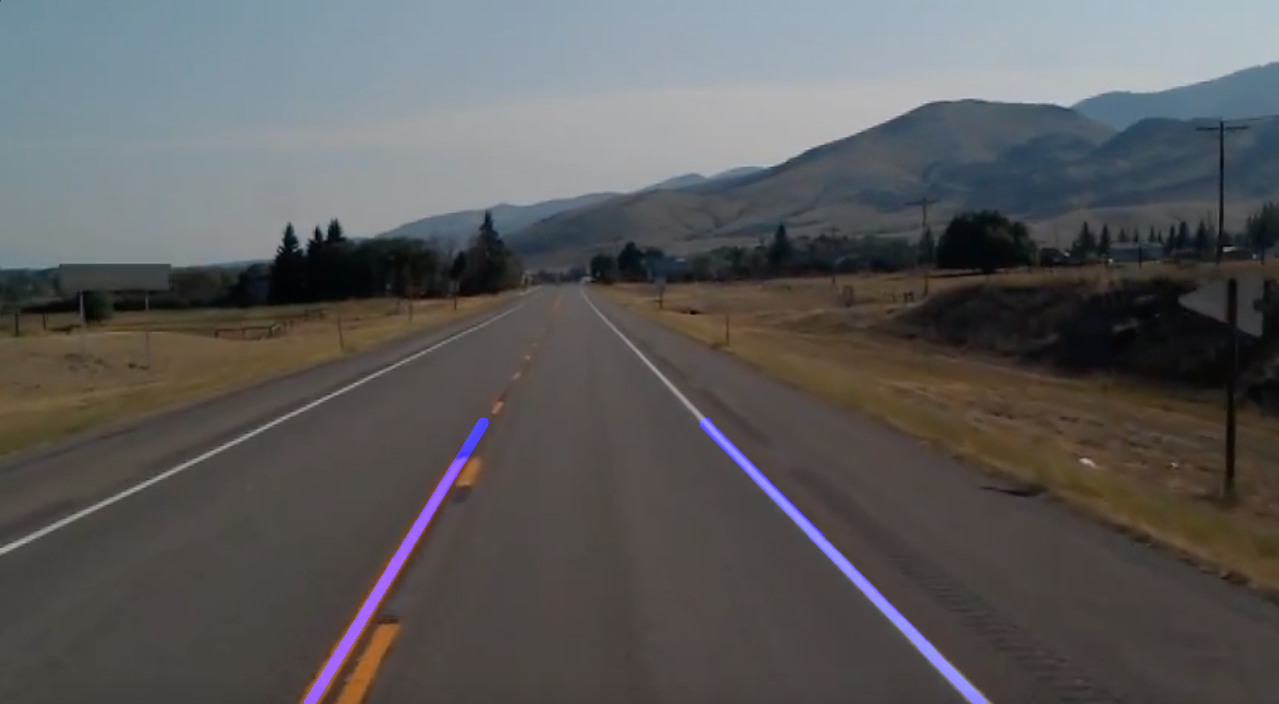

In [ ]:
averaged_lines=average_slope_intercept(lane_image,lines)
line_image=display_lines(lane_image,averaged_lines)
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
cv2_imshow(combo_image)